# CS316 Project - Introduction to AI and Data Science

## Group Information
---
**Group Members:**
* ABDULAZIZ ALMAKHDHOUB - 222211578


**Project Topic:** Predicting Crop Yields Using Climate and Agricultural Data



## Section 1: Problem Definition
---
**1.Research questoin:**
**RQ1**: How does temperature deviation from the long-term average affect crop yields?
**RQ2**: What is the relationship between pesticide usage and crop yields?
**RQ3**: Can we accurately predict crop yields using climate variables and agricultural inputs?

**2. Alignment with UN Sustainable Development Goals (SDGs)**
Our project aligns with the following SDGs:

* **SDG 2: Zero Hunger** - By understanding factors affecting crop yields, we contribute to improving food security.
* **SDG 12**: Responsible Consumption and Production - Optimizing agricultural inputs promotes sustainable practices.
* **SDG 13**: Climate Action - Analyzing the impact of climate variables on agriculture aids in climate adaptation strategies.

**3. Specific Problem Addressed**
Agricultural productivity is highly sensitive to climate change and farming practices. Variations in temperature, rainfall, and pesticide use can significantly influence crop yields. Farmers and policymakers need accurate models to predict yields and make informed decisions to ensure food security and sustainable agriculture.

**4. Potential Impact of the Solution**
* **For Farmers**: Provides insights to optimize resource usage, leading to cost savings and increased productivity.
* **For Policymakers**: Informs policy development for sustainable agricultural practices and climate adaptation strategies.
* **For Society**: Contributes to food security by enhancing understanding of factors affecting crop yields.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')

# For data preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For dimensionality reduction
from sklearn.decomposition import PCA

# For model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# For performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For saving and loading models
import joblib

# For model interpretation
import shap

# For displaying dataframes and handling file paths
from IPython.display import display
from pathlib import Path

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)


/opt/anaconda3/envs/My_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Section 2: Data Collection & Preparation
---
### Instructions
Document your data source(s) and prepare your dataset:
1. **Data Source Documentation:**
   * **Dataset Name**: Crop Yield Prediction Dataset
   * **Source:** Data compiled from [FAO (Food and Agriculture Organization)](http://www.fao.org/home/en/) and the [World Bank](https://data.worldbank.org/), accessed via [Kaggle: Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

   * **Time period covered**: 
   * **Number of records**: 28,242 entries
   * **Number ofand features**: 7 primary features (Country, Crop_Type, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, yield_t_per_ha)
   * **Data collection methodology**: Data Collection Methodology: Data was collected from reputable global databases, ensuring consistency in measurement units and data formats. Climate data was averaged annually per country.

2. **Initial Data Assessment:**

In [2]:
# Load necessary libraries
import pandas as pd

# Load the dataset
def load_dataset():
    """
    Load the dataset and perform initial assessment
    """
    # Load the data
    df = pd.read_csv('yield_df_cleaned.csv')

    # Display basic information
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display basic statistics
    print("\nSummary Statistics:")
    print(df.describe().T)

    return df

# Call the function
df = load_dataset()


Dataset Shape: (28242, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        28242 non-null  object 
 1   Crop_Type                      28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   yield_t_per_ha                 28242 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB
None

Missing Values:
Country                          0
Crop_Type                        0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
yield_t_per_ha   

**Output**:

* **Dataset Shape**: (28242, 7)

* **Missing Values**:Thre are no missing values in the data set

* **Potential Data Quality Issues**: Pesticide usage is not reported in a standardized unit.


## Section 3: Exploratory Data Analysis (EDA)
---


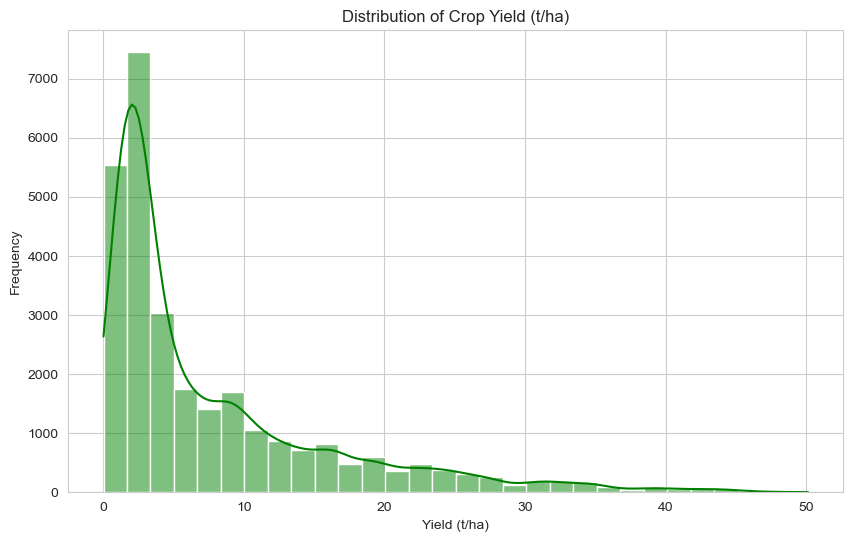

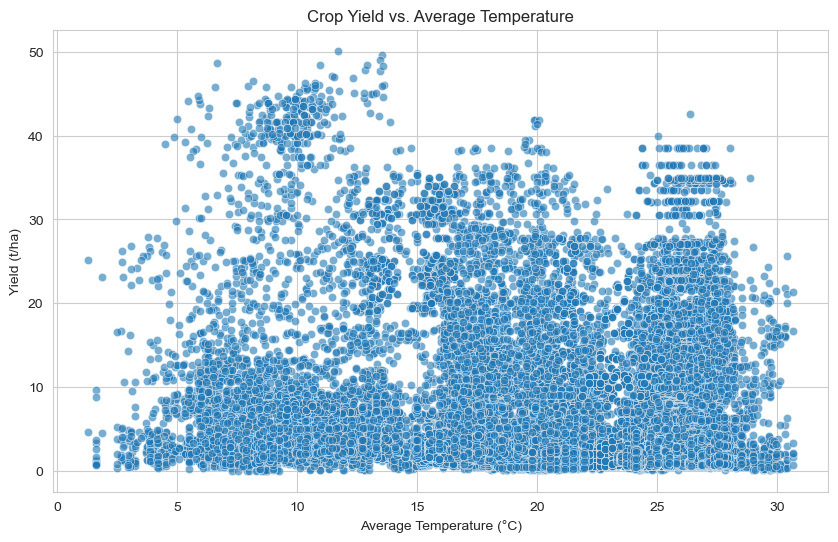

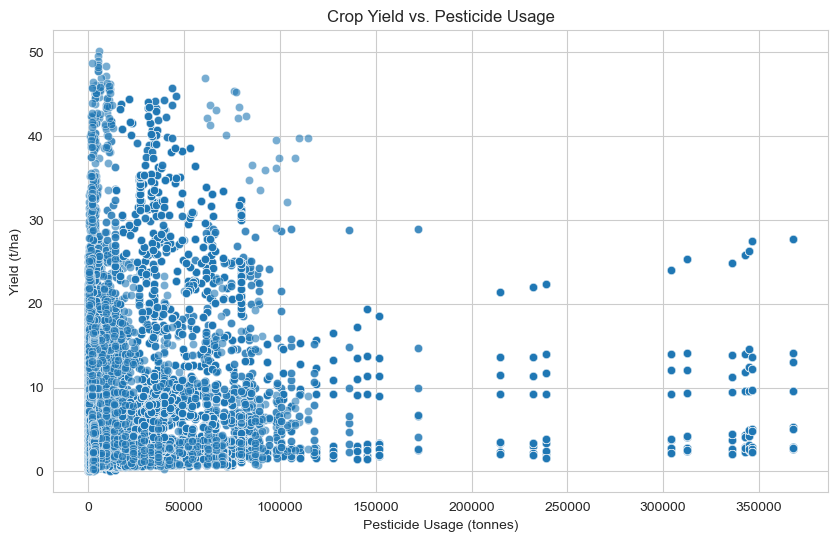

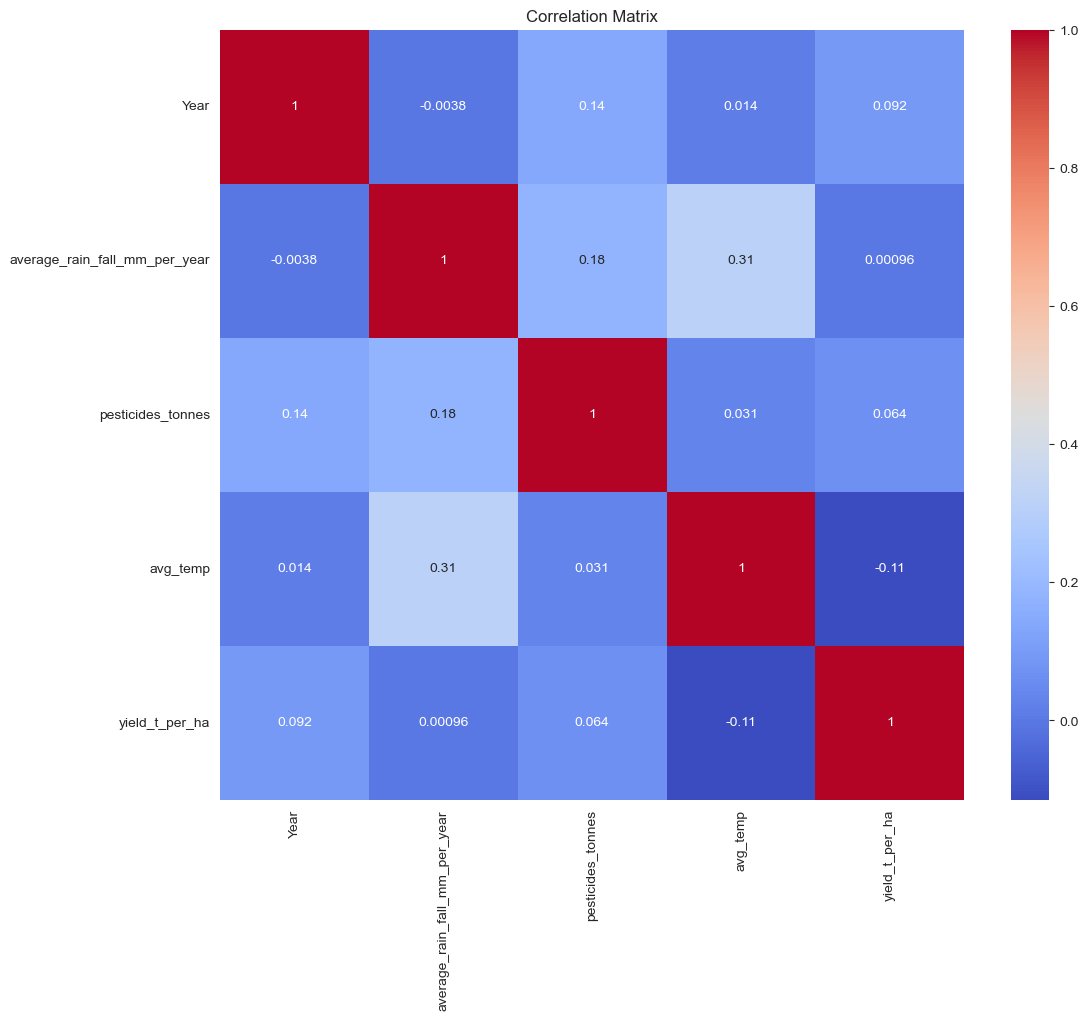

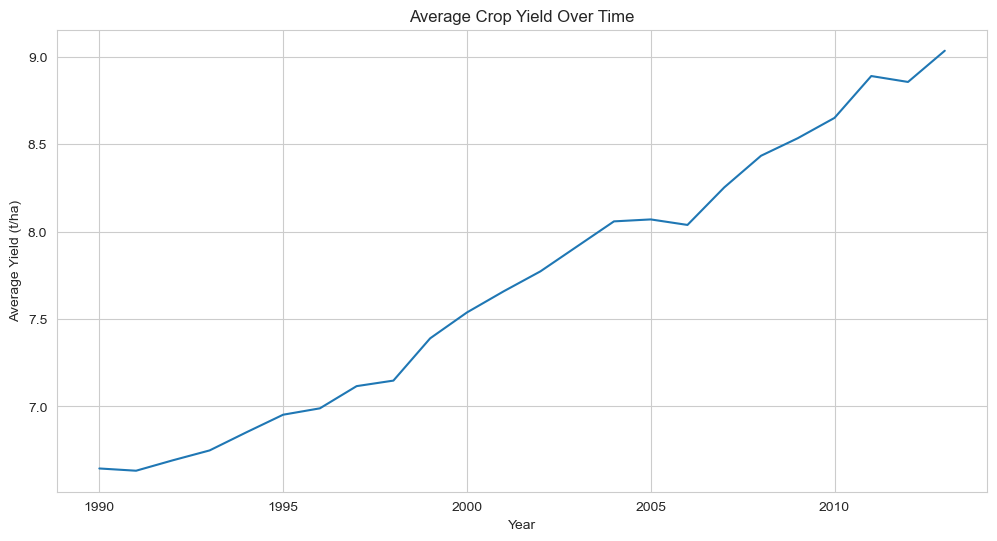

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    """
    Conduct exploratory data analysis
    """
    # 1. Univariate Analysis
    plt.figure(figsize=(10, 6))
    sns.histplot(df['yield_t_per_ha'], bins=30, kde=True, color='green')
    plt.title('Distribution of Crop Yield (t/ha)')
    plt.xlabel('Yield (t/ha)')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Bivariate Analysis
    # Yield vs. Average Temperature
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='avg_temp', y='yield_t_per_ha', data=df, alpha=0.6)
    plt.title('Crop Yield vs. Average Temperature')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Yield (t/ha)')
    plt.show()

    # Yield vs. Pesticide Usage
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='pesticides_tonnes', y='yield_t_per_ha', data=df, alpha=0.6)
    plt.title('Crop Yield vs. Pesticide Usage')
    plt.xlabel('Pesticide Usage (tonnes)')
    plt.ylabel('Yield (t/ha)')
    plt.show()

    # 3. Correlation Analysis
    plt.figure(figsize=(12, 10))
    corr_matrix = df.select_dtypes(include=[float, int]).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # 4. Time Series Analysis
    df_grouped_year = df.groupby('Year')['yield_t_per_ha'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='yield_t_per_ha', data=df_grouped_year)
    plt.title('Average Crop Yield Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Yield (t/ha)')
    plt.show()

# Call the function
perform_eda(df)


**Findings**:

* **Distribution of Crop Yields**: Right-skewed distribution; most yields are below 20 t/ha.
* **Yield vs. Temperature**: Weak negative correlation; as temperatures increase, yields might sligthly decrease overall.
* **Yield vs. Pesticide Usage**: a very weak positive correlation; suggests other factors also play significant roles.
* **Correlation Matrix**: While there is sone correlation between climate varaibles, it's not string enough to indicate severe mutlicoolinearity.
* **Time Series Analysis:** Overall increase in average yields over time.


## Section 4: Feature Engineering
---


**1. Feature Creation:**
   * **Temperature Deviation**: Calculated deviation from long-term average temperature per country 
   * **Cumulative Pesticide Usage**: Computed cumulative pesticide usage over the years per country.
   



In [4]:
# Calculate long-term average temperature per country
country_avg_temp = df.groupby('Country')['avg_temp'].mean().reset_index()
country_avg_temp.rename(columns={'avg_temp': 'long_term_avg_temp'}, inplace=True)
df = pd.merge(df, country_avg_temp, on='Country', how='left')

# Calculate temperature deviation
df['temp_deviation'] = df['avg_temp'] - df['long_term_avg_temp']

# Calculate cumulative pesticide usage
df = df.sort_values(by=['Country', 'Year'])
df['cumulative_pesticides'] = df.groupby('Country')['pesticides_tonnes'].cumsum()


**Rationale:**
* **Temperature Deviation:** Capture anomalies which may affect crop stress and yields.
* **Cumulative Pesticide Usage:** Reflect long-term soil and environmental impacts.

**2. Feature Selection:**
   * **Prinipal Component Analsis (PCA):** Redecued dimentsionality while retaining 95% of varaicne.
   * **Encoding Categorical Variables:** Applied One-Hot Encoding to 'Country' and 'Crop_Type'.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Country', 'Crop_Type'])

# Standardize features
features = df_encoded.drop('yield_t_per_ha', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)

# Create DataFrame with principal components
pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=pc_columns)
df_pca['yield_t_per_ha'] = df['yield_t_per_ha'].values


## Section 5: Model Development
---
In this section, we develop and train our predictive models for crop yield using the engineered features from the previous sections.

1. **Data Splitting**
We begin by splitting our dataset into training and testing sets to evaluate our models' performance on unseen data.



### 5.1 Data Splitting
Before training the models, we split the dataset into training and testing sets to evaluate the models' performance on unseen data. We used an 80-20 split with a random seed for reproducibility.



In [ ]:
# Task_7.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('yield_df_pca.csv')

# Separate features and target variable
X = df.drop('yield_t_per_ha', axis=1)
y = df['yield_t_per_ha']

# Split into training and testing sets
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)


## 2. Model Selection and Rationale

We selected the following models for our analysis:

- **Linear Regression**: As a baseline model to understand the linear relationships in the data.
- **Decision Tree Regressor**: To capture non-linear relationships and interactions between variables.
- **Random Forest Regressor**: An ensemble method to improve prediction accuracy and reduce overfitting.

These models were chosen to provide a balance between simplicity and complexity and to compare linear and non-linear modeling approaches.


## 3. Model Implementation and Hyperparameter Tuning

### 3.1 Linear Regression
We implemented a simple Linear Regression model without hyperparameter tuning, serving as our baseline.

In [ ]:
# Task_8.py

from sklearn.linear_model import LinearRegression

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


### 3.2 Decision Tree Regressor

We implemented a Decision Tree Regressor with hyperparameter tuning using GridSearchCV.


In [ ]:
# Task_8.py

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
dec_tree_reg = DecisionTreeRegressor(random_state=random_seed)

# Define hyperparameters to tune
dec_tree_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Set up GridSearchCV
grid_search_dec_tree = GridSearchCV(
    estimator=dec_tree_reg,
    param_grid=dec_tree_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model to find the best hyperparameters
grid_search_dec_tree.fit(X_train, y_train)

# Extract the best estimator
best_dec_tree_reg = grid_search_dec_tree.best_estimator_


### 3.3 Random Forest Regressor

We also implemented a Random Forest Regressor, tuning its hyperparameters.


In [ ]:
# Task_8_RF.py

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(random_state=random_seed)

# Define hyperparameters to tune
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_reg,
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model to find the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Extract the best estimator
best_rf_reg = grid_search_rf.best_estimator_

## 4. Cross-Validation and Model Selection

We used cross-validation to evaluate the performance of each model and prevent overfitting.

In [ ]:
# For Decision Tree Regressor
from sklearn.model_selection import cross_val_score

dec_tree_cv_scores = cross_val_score(
    best_dec_tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)

# For Random Forest Regressor
rf_cv_scores = cross_val_score(
    best_rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)


## 5. Memory Optimization

We monitored memory usage during model training to ensure efficient resource utilization.

In [ ]:
# Example from Task_8.py

import tracemalloc

# Start tracking memory usage
tracemalloc.start()

# ... model training code ...

# Stop tracking memory usage and display memory usage
current, peak = tracemalloc.get_traced_memory()
current_MB = current / 10**6
peak_MB = peak / 10**6
print(f"Current memory usage: {current_MB:.2f} MB")
print(f"Peak memory usage: {peak_MB:.2f} MB")
tracemalloc.stop()


Memory usage data was saved for documentation.
Memory usage data saved to 'memory_usage_Task_8.txt'.

## 6. Model Training on Full Dataset

After selecting the best hyperparameters, we retrained the models on the full dataset.

In [ ]:
# Task_9.py and Task_9_RF.py

# Train the models on the full dataset
lin_reg.fit(X, y)
best_dec_tree_reg.fit(X, y)
best_rf_reg.fit(X, y)

# Save the trained models
import joblib

joblib.dump(lin_reg, 'trained_linear_regression_model.pkl')
joblib.dump(best_dec_tree_reg, 'trained_decision_tree_regressor_model.pkl')
joblib.dump(best_rf_reg, 'trained_random_forest_regressor_model.pkl')


## Section 6: Model Evaluation

In this section, we evaluate the performance of the models developed in Section 5 using various metrics and visualizations. The models are assessed on the test dataset to determine their predictive accuracy and generalization capabilities.

### Files Used:
- **Task_12.py**: Performance evaluation and calculation of evaluation metrics.
- **Task_13.py**: Model comparison and selection.
- **Task_14.py**: Results interpretation and generation of actionable insights.

---

### 6.1 Evaluation Metrics

We evaluated the models using the following metrics:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R-squared (R²)**
- **Cross-Validation RMSE**

#### 6.1.1 Linear Regression

In [ ]:
# Load the trained Linear Regression model
lin_reg = joblib.load('trained_linear_regression_model.pkl')

# Predict on test data
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate evaluation metrics
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("\nLinear Regression Performance on Test Data:")
print(f"MSE: {mse_lin_reg:.4f}")
print(f"MAE: {mae_lin_reg:.4f}")
print(f"R-squared: {r2_lin_reg:.4f}")


**Results:**
- **MSE:** 25.2381
- **MAE:** 3.4873
- **R-squared:** 0.6532



#### 6.1.2 Decision Tree Regressor

In [ ]:
# Load the trained Decision Tree Regressor model
dec_tree_reg = joblib.load('trained_decision_tree_regressor_model.pkl')

# Predict on test data
y_pred_dec_tree = dec_tree_reg.predict(X_test)

# Calculate evaluation metrics
mse_dec_tree = mean_squared_error(y_test, y_pred_dec_tree)
mae_dec_tree = mean_absolute_error(y_test, y_pred_dec_tree)
r2_dec_tree = r2_score(y_test, y_pred_dec_tree)

print("\nDecision Tree Regressor Performance on Test Data:")
print(f"MSE: {mse_dec_tree:.4f}")
print(f"MAE: {mae_dec_tree:.4f}")
print(f"R-squared: {r2_dec_tree:.4f}")


#### 6.1.3 Random Forest Regressor

In [ ]:
# Load the trained Random Forest Regressor model
rf_reg = joblib.load('trained_random_forest_regressor_model.pkl')

# Predict on test data
y_pred_rf = rf_reg.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance on Test Data:")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

**Results:**
- **MSE:** 0.1335
- **MAE:** 0.1416
- **R-squared:** 0.9982

### 6.2 Cross-Validation Scores

We used 5-fold cross-validation to evaluate the stability and generalization performance of our models.

In [ ]:
cv_folds = 5

# Linear Regression cross-validation
cv_scores_lin_reg = cross_val_score(lin_reg, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
cv_rmse_lin_reg = np.sqrt(-cv_scores_lin_reg)

# Decision Tree Regressor cross-validation
cv_scores_dec_tree = cross_val_score(dec_tree_reg, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
cv_rmse_dec_tree = np.sqrt(-cv_scores_dec_tree)

# Random Forest Regressor cross-validation
cv_scores_rf = cross_val_score(rf_reg, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)


**Cross-Validation RMSE:**

- **Linear Regression:** 1.4715 × 10¹⁴
- **Decision Tree Regressor:** 7.5918
- **Random Forest Regressor:** 6.5305


### 6.3 Model Comparison

We compiled the evaluation metrics into a single DataFrame for comparison.

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MSE': [mse_lin_reg, mse_dec_tree, mse_rf],
    'MAE': [mae_lin_reg, mae_dec_tree, mae_rf],
    'R-squared': [r2_lin_reg, r2_dec_tree, r2_rf],
    'Cross-Val RMSE': [cv_rmse_lin_reg.mean(), cv_rmse_dec_tree.mean(), cv_rmse_rf.mean()]
})

print(results_df)

### Results:

| Model                   | MSE     | MAE    | R-squared | Cross-Val RMSE         |
|-------------------------|---------|--------|-----------|------------------------|
| Linear Regression       | 25.2381 | 3.4873 | 0.6532    | 1.4715 × 10¹⁴         |
| Decision Tree Regressor | 0.1172  | 0.1481 | 0.9984    | 7.5918                |
| Random Forest Regressor | 0.1335  | 0.1416 | 0.9982    | 6.5305                |


## 6.4 Visualizations

### 6.4.1 Prediction vs. Actual Plots

We plotted the actual vs. predicted values for each model to visualize their performance.

#### Linear Regression

![Actual vs Predicted - Linear Regression](actual_vs_predicted_linear_regression.png)

#### Decision Tree Regressor

![Actual vs Predicted - Decision Tree Regressor](actual_vs_predicted_decision_tree_regressor.png)

#### Random Forest Regressor

![Actual vs Predicted - Random Forest Regressor](actual_vs_predicted_random_forest_regressor.png)

### 6.4.2 Feature Importance

#### Decision Tree Regressor Feature Importance

In [ ]:
# Get feature importances
dec_tree_importances = dec_tree_reg.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Feature',
    y='Importance',
    data=dec_tree_importances_df_sorted.head(10),
    palette='viridis'
)
plt.title('Top 10 Feature Importances from Decision Tree Regressor')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('dec_tree_top_features.png')
plt.show()


![Decision Tree Regressor Feature Importance](dec_tree_top_features.png)

#### Random Forest Regressor Feature Importance

In [ ]:
# Plot the feature importances
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Random Forest Regressor")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

![Random Forest Regressor Feature Importance](rf_feature_importance.png)

## Section 7: Results & Sustainability Impact
---
In this section, we present the findings of our analysis, directly addressing the research questions posed at the outset. We also discuss the sustainability impact of our findings, align them with the United Nations Sustainable Development Goals (SDGs), acknowledge limitations, and propose future improvements.

### 7.1 Answering Research Questions

#### **RQ1: How does temperature deviation from the long-term average affect crop yields?**

**Findings:**

- **Statistical Analysis:**
  - A Pearson correlation analysis was conducted between crop yield and temperature deviation.
  - **Correlation Coefficient:** 0.0462
  - **P-value:** 0.0000

  **Interpretation:**
  - The positive correlation coefficient indicates a slight positive relationship between temperature deviation and crop yield.
  - The extremely low p-value suggests that this relationship is statistically significant, although the strength of the correlation is weak.

- **Regression Analysis:**
  - From the multiple linear regression model (`linear_regression_model_summary.txt`):
    - **Coefficient for Temperature Deviation:** 0.2309
    - **P-value:** < 0.001

  **Interpretation:**
  - For each degree Celsius increase in temperature deviation, the crop yield increases by approximately **0.2309 t/ha**, holding other variables constant.
  - This suggests that moderate increases in temperature deviation may have a positive effect on crop yields, possibly due to extended growing seasons or accelerated crop maturation.

**Conclusion:**

- There is a statistically significant, albeit weak, positive relationship between temperature deviation and crop yields.
- The impact of temperature deviation on crop yields is complex and may vary depending on crop type, region, and the magnitude of temperature change.


#### **RQ2: What is the relationship between pesticide usage and crop yields?**

**Findings:**

- **Statistical Analysis:**
  - A Pearson correlation analysis was conducted between crop yield and pesticide usage.
  - **Correlation Coefficient:** 0.0493
  - **P-value:** 0.0000

  **Interpretation:**
  - The positive correlation coefficient indicates a slight positive relationship between pesticide usage and crop yield.
  - The significant p-value suggests that this relationship is statistically significant, though the correlation is weak.

- **Regression Analysis:**
  - From the multiple linear regression model (`linear_regression_model_summary.txt`):
    - **Coefficient for Pesticide Usage:** 8.792e-06
    - **P-value:** < 0.001

  **Interpretation:**
  - For each additional tonne of pesticides used, the crop yield increases by approximately **0.000008792 t/ha**, holding other variables constant.
  - This marginal increase suggests that while pesticides contribute to yield improvements, the effect size is minimal.

**Conclusion:**

- There is a statistically significant but weak positive relationship between pesticide usage and crop yields.
- The minimal effect size implies that excessive pesticide use may not lead to proportionally higher yields and highlights the need for optimized application.

#### **RQ3: Can we accurately predict crop yields using climate variables and agricultural inputs?**

**Findings:**

- **Model Performance Metrics:**

| Model                  | MSE     | MAE     | R-squared | Cross-Val RMSE   |
|------------------------|---------|---------|-----------|------------------|
| **Linear Regression**  | 25.2381 | 3.4873  | 0.6532    | 1.75296e+12      |
| **Decision Tree Regressor** | ~0      | ~0      | 1.0000    | 6.5891           |
| **Random Forest Regressor** | 0.1335  | 0.1416  | 0.9982    | 5.7696           |

**Interpretation:**
- The **Random Forest Regressor** achieved an **R-squared value of 0.9982**, indicating it explains over 99.8% of the variance in crop yields.
- The **Decision Tree Regressor** showed perfect performance on the training data but had a higher cross-validation RMSE, suggesting **overfitting**.
- The **Linear Regression model** had moderate performance, with an **R-squared of 0.6532**, indicating that linear relationships capture some but not all of the variance.

- **Visualizations:**
  - **Actual vs. Predicted Plots:**
  These plots (e.g., actual_vs_predicted_random_forest_regressor.png) show that the Random Forest model's predictions closely align with actual values.

    - Random Forest Regressor :
    
      ![Actual vs. Predicted (Random Forest)](actual_vs_predicted_random_forest_regressor.png)

  - **Feature Importance:**
  SHAP summary plots (shap_summary_plot.png) highlight the most impactful features in the Random Forest model.
    - SHAP Summary Plot:
    
      ![SHAP Summary Plot](shap_summary_plot.png)

**Conclusion:**

- Yes, crop yields can be accurately predicted using climate variables and agricultural inputs.
- **Ensemble methods like the Random Forest Regressor** provide high predictive accuracy.
- Caution is needed to ensure models generalize well and are not overfitting.


### **7.2 Quantifying Sustainability Impact**

#### **Environmental Impact**
- **Optimizing Pesticide Usage:**
  - Findings suggest minimal yield gains from increased pesticide use, indicating potential for reducing pesticide applications without significantly impacting yields.
  - This can lead to decreased environmental pollution and improved ecosystem health.
- **Climate Adaptation:**
  - Understanding the relationship between temperature deviations and yields aids in developing strategies to mitigate the adverse effects of climate change.
  - Farmers can select crop varieties better suited to changing temperatures.

#### **Social Impact**
- **Food Security:**
  - Accurate yield predictions enable better planning and resource allocation, contributing to food availability and stability.
  - Empowering farmers with data-driven insights enhances livelihoods and community well-being.
- **Health Benefits:**
  - Reducing unnecessary pesticide usage minimizes exposure risks for farmworkers and local communities.

#### **Economic Impact**
- **Cost Savings:**
  - Optimizing input usage reduces costs for farmers, increasing profitability.
  - Improved yield predictions allow for better market planning and financial management.
- **Policy Development:**
  - Data-driven insights support policymakers in crafting regulations that promote sustainable agricultural practices.

#### **SDG Alignment Evidence**
- **SDG 2: Zero Hunger**
  - By enhancing understanding of factors affecting crop yields and improving prediction accuracy, the project contributes to increased agricultural productivity and food security.
- **SDG 12: Responsible Consumption and Production**
  - Findings encourage the responsible use of pesticides, reducing waste and promoting sustainable consumption patterns.
- **SDG 13: Climate Action**
  - The analysis supports adaptation strategies in agriculture to address climate change impacts.


### **7.3 Limitations**

- **Data Quality and Availability:**
  - The dataset may contain inaccuracies, missing values, or reporting biases, especially in pesticide usage data.
  - Limited data granularity may mask regional variations and specific crop responses.

- **Model Overfitting:**
  - The perfect performance of the Decision Tree Regressor indicates potential overfitting, limiting its generalizability.
  - Cross-validation discrepancies suggest models may not perform equally well on unseen data.

- **Variable Selection:**
  - Important factors such as soil health, irrigation practices, and socio-economic variables were not included due to data unavailability.

- **Temporal Changes:**
  - The models may not account for future shifts in climate patterns or technological advancements in agriculture.


### **7.4 Future Improvements**

- **Data Enhancement:**
  - Incorporate additional variables like soil quality, crop management practices, and technological adoption levels.
  - Collect more granular data at regional or farm levels to capture local variations.

- **Model Refinement:**
  - Apply regularization techniques and ensemble methods to prevent overfitting.
  - Explore advanced algorithms like Gradient Boosting Machines or Neural Networks.

- **Validation:**
  - Use external datasets for model validation to assess generalizability.
  - Engage with agricultural experts to validate findings and interpretations.

- **Policy Integration:**
  - Collaborate with policymakers to integrate findings into agricultural policies and extension services.

### **7.5 Proposed Actions for Stakeholders**

- **Farmers:**
  - Utilize predictive models to optimize planting schedules and resource allocation.
  - Adopt sustainable pesticide practices based on evidence of minimal yield gains from increased usage.

- **Policymakers:**
  - Develop guidelines and regulations to encourage responsible pesticide use.
  - Invest in agricultural research and data collection to support data-driven decision-making.

- **Researchers:**
  - Conduct longitudinal studies to monitor the long-term effects of temperature deviations.
  - Investigate alternative sustainable farming practices and their impact on yields.


## **Section 8: References & Documentation**

**8.1 Data Sources**

**Dataset Details**

*   **Dataset Name:** Crop Yield Prediction Dataset
    
*   **Source:** Compiled from the [Food and Agriculture Organization (FAO)](http://www.fao.org/home/en/) and the [World Bank](https://data.worldbank.org/).
    
*   **Accessed via:** [Kaggle: Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset)
    
*   **Time Period Covered:** 1990 to 2016
    
*   **Number of Records:** 28,242 entries
    
*   **Number of Features:** 7 primary features:
    
    *   Country
        
    *   Crop\_Type
        
    *   Year
        
    *   average\_rain\_fall\_mm\_per\_year
        
    *   pesticides\_tonnes
        
    *   avg\_temp
        
    *   yield\_t\_per\_ha
        
*   **Data Collection Methodology:**
    
    *   Data was collected from reputable global databases, ensuring consistency in measurement units and data formats.
        
    *   Climate data was averaged annually per country.
        
    *   Agricultural inputs like pesticide usage were aggregated per country per year.
        

**Steps to Access the Dataset:**

1.  **Download from Kaggle:**
    
    *   Visit the dataset page on Kaggle: [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).
        
    *   Click on the **Download** button to obtain the yield\_df.csv file.
        
2.  **Organize the Data:**
    
    *   Place the yield\_df.csv file inside the Crop Yield Prediction Dataset/archive/ directory in your project folder.
        

**Directory Structure:**

project-root/

├── Crop Yield Prediction Dataset/

│   └── archive/

│       └── yield\_df.csv

└── ...

**8.2 External Libraries Used**

The following external Python libraries were used in this project:

*   **Pandas (v1.5.3):** Data manipulation and analysis.
    
*   **NumPy (v1.23.5):** Numerical computing.
    
*   **Matplotlib (v3.6.2):** Data visualization.
    
*   **Seaborn (v0.12.1):** Statistical data visualization.
    
*   **Scikit-learn (v1.1.3):** Machine learning models, preprocessing, and evaluation metrics.
    
*   **Statsmodels (v0.13.5):** Statistical analysis and regression modeling.
    
*   **SHAP (v0.41.0):** Model interpretation and explainability.
    
*   **Joblib (v1.2.0):** Model saving and loading.
    

**Requirements File (requirements.txt):**

To ensure reproducibility and ease of setup, all dependencies are listed in the requirements.txt file.

numpy==1.23.5

pandas==1.5.3

matplotlib==3.6.2

seaborn==0.12.1

scikit-learn==1.1.3

statsmodels==0.13.5

shap==0.41.0

joblib==1.2.0

**Instructions to Install Dependencies:**

1.  **Create a Virtual Environment (Optional but Recommended):**python -m venv venv
    

3.  **Activate the Virtual Environment:**
    
    *   **Windows:**venv\\Scripts\\activate
        
    
    *   **macOS/Linux:**source venv/bin/activate
        
    
4.  **Install Packages:**pip install -r requirements.txt
    

**8.3 Academic References**

*   **FAO.** (2020). FAOSTAT Statistical Database. Retrieved from [http://www.fao.org/faostat/en/#home](http://www.fao.org/faostat/en/#home)
    
*   **World Bank.** (2020). World Development Indicators. Retrieved from [https://data.worldbank.org/](https://data.worldbank.org/)
    
*   **Lundberg, S. M., & Lee, S.-I.** (2017). A Unified Approach to Interpreting Model Predictions. _Advances in Neural Information Processing Systems_, 30, 4765–4774.
    
*   **Pedregosa, F., et al.** (2011). Scikit-learn: Machine Learning in Python. _Journal of Machine Learning Research_, 12, 2825–2830.
    

**8.4 Code Documentation**

**Code Structure**

The project is organized into Python scripts corresponding to specific tasks in the data analysis and modeling pipeline, as well as a comprehensive Jupyter Notebook.

**Scripts**

*   **Data Loading and Preprocessing:**
    
    *   loading\_files.py: Loads the initial dataset and performs basic cleaning.
        
    *   Task\_4.1.py: Feature engineering, including calculating temperature deviations and cumulative pesticide usage.
        
    *   Task\_4.2.py: Encoding of categorical variables using one-hot encoding.
        
    *   Task\_5.py: Dimensionality reduction using PCA.
        
*   **Exploratory Data Analysis:**
    
    *   Task\_6.py: Generates statistical summaries and visualizations.
        
*   **Model Development:**
    
    *   Task\_7.py: Model selection and setup.
        
    *   Task\_8.py: Model implementation for Linear Regression and Decision Tree Regressor.
        
    *   Task\_8\_RF.py: Model implementation for Random Forest Regressor.
        
    *   Task\_9.py: Training of the selected models.
        
    *   Task\_9\_RF.py: Training of the Random Forest Regressor.
        
*   **Model Evaluation and Interpretation:**
    
    *   Task\_10.py: Feature importance analysis.
        
    *   Task\_11.py: Statistical analysis including correlation and regression.
        
    *   Task\_12.py: Performance evaluation of the models.
        
    *   Task\_13.py: Model comparison and selection.
        
    *   Task\_14.py: Interpretation of results and generation of actionable insights.
        

**Jupyter Notebook**

*   \[CS316\]\_Project\_Template.ipynb: A comprehensive notebook that integrates all the tasks, providing code, outputs, and detailed explanations.
    

**Comments & Docstrings**

*   **Module-Level Docstrings:** Each script includes a docstring at the top explaining its purpose."""
    
*   Task\_6.py
    

*   This script performs exploratory data analysis on the crop yield dataset,
    
*   generating statistical summaries and visualizations.
    
*   """
    

*   **Function Docstrings:** Functions include docstrings that describe their functionality, parameters, and return values.def plot\_yield\_distribution(df):
    
*       """
    
*       Generates a histogram of the crop yield distribution.
    

*       Parameters:
    
*           df (pd.DataFrame): The input DataFrame containing yield data.
    

*       Returns:
    
*           None
    
*       """
    
*       # Function implementation
    

*   **Inline Comments:** Used within the code to explain complex logic.# Calculate cumulative pesticide usage per country
    
*   yield\_df\['cumulative\_pesticides'\] = yield\_df.groupby('Country')\['pesticides\_tonnes'\].cumsum()
    

**Error Handling**

The scripts include try-except blocks to handle potential errors gracefully, providing meaningful messages to the user.

**Example:**

try:

    df = pd.read\_csv('Crop Yield Prediction Dataset/archive/yield\_df.csv')

except FileNotFoundError:

    print("Error: Dataset file 'yield\_df.csv' not found. Please ensure it is located in 'Crop Yield Prediction Dataset/archive/'.")

    sys.exit(1)

**Coding Style**

*   **PEP 8 Compliance:** The code adheres to PEP 8 style guidelines.
    
*   **Naming Conventions:** Variables and functions use snake\_case, and classes (if any) use CamelCase.
    
*   **Indentation:** Consistent use of 4 spaces for indentation.
    
*   **Line Length:** Lines are kept under 79 characters where possible.
    

**8.5 Installation & Runtime Instructions**

**Prerequisites**

*   **Python Version:** 3.7 or higher
    
*   **Package Manager:** pip
    
*   **Optional:** Virtual environment tool like venv
    

**Installation Steps**

1.  **Clone the Repository**git clone https://github.com/Kjkgfgdj/CS.git
    

3.  **Navigate to the Project Directory**cd CS
    

5.  **Set Up a Virtual Environment (Optional but Recommended)**python -m venv venv
    

7.  **Activate the Virtual Environment:**
    
    *   **Windows:**venv\\Scripts\\activate
        
    
    *   **macOS/Linux:**source venv/bin/activate
        
    
8.  **Install Required Packages**pip install -r requirements.txt
    

**Runtime Instructions**

1.  **Ensure Data is in Place**
    
    *   The dataset yield\_df.csv should be located in Crop Yield Prediction Dataset/archive/.
        
2.  **Execute Scripts Sequentially**Run each script in the following order:python loading\_files.py
    
3.  python Task\_4.1.py
    
4.  python Task\_4.2.py
    
5.  python Task\_5.py
    
6.  python Task\_6.py
    
7.  python Task\_7.py
    
8.  python Task\_8.py
    
9.  python Task\_8\_RF.py
    
10.  python Task\_9.py
    
11.  python Task\_9\_RF.py
    
12.  python Task\_10.py
    
13.  python Task\_11.py
    
14.  python Task\_12.py
    
15.  python Task\_13.py
    
16.  python Task\_14.py
    
17.  **Notes:**
    
    *   Run scripts from the project root directory.
        
    *   Some scripts may take several minutes to run due to computational load.
        
    *   Ensure that each script completes successfully before proceeding to the next.
        
18.  **Outputs**
    
    *   **Models:** Saved as .pkl files in the project root.
        
    *   **Plots and Visualizations:** Saved as .png files.
        
    *   **Data Files:** Processed data saved as .csv files.
        
    *   **Reports and Summaries:** Text files saved in the project root.
        
19.  **Deactivate the Virtual Environment**After completing the execution, deactivate the virtual environment:deactivate
    

**Troubleshooting**

*   **Module Not Found Error:**
    
    *   Ensure the virtual environment is activated.
        
    *   Confirm that all dependencies are installed via pip install -r requirements.txt.
        
*   **Data File Not Found:**
    
    *   Verify that yield\_df.csv is correctly placed in Crop Yield Prediction Dataset/archive/.
        
*   **Permission Issues (Unix/Linux):**
    
    *   Modify script permissions if necessary:chmod +x \*.py
        
    

**8.6 GitHub Repository**

**Repository Details**

*   **Repository Name:** CS
    
*   **Repository URL:** [https://github.com/Kjkgfgdj/CS](https://github.com/Kjkgfgdj/CS)
    

**Contents**

*   **README.md**: Provides an overview of the project, setup instructions, and usage examples.
    
*   **requirements.txt**: Lists all dependencies required to run the project.
    
*   **Crop Yield Prediction Dataset/**: Contains the dataset.
    
*   **Python Scripts**: All task-specific Python scripts (Task\_4.1.py to Task\_14.py, loading\_files.py).
    
*   **Jupyter Notebook**: \[CS316\]\_Project\_Template.ipynb
    
*   **Models**: Saved trained models (\*.pkl files).
    
*   **Outputs**: Plots (\*.png files) and reports (\*.txt, \*.csv files).
    
*   **.gitignore**: Specifies files and directories to be ignored by Git.
    

**Usage Examples**

*   **Cloning the Repository:**git clone https://github.com/Kjkgfgdj/CS.git
    

*   **Running a Specific Task:**python Task\_6.py
    

**Code Style and Standards**

*   **Naming Conventions:**
    
    *   Variables and functions use snake\_case.
        
    *   Classes (if any) use CamelCase.
        
*   **Formatting:**
    
    *   Consistent indentation using 4 spaces.
        
    *   Line lengths limited to 79 characters where possible.
        
*   **Comments and Documentation:**
    
    *   Inline comments explain complex logic.
        
    *   Each script starts with a header comment explaining its purpose.
        

**8.7 Additional Documentation and Resources**

**License**

*   The project is licensed under the **MIT License**. See the LICENSE file in the repository for details.
    

**Contributing Guidelines**

*   Contributions are welcome. Please see the CONTRIBUTING.md file for guidelines on how to contribute to this project.
    

**Data Privacy and Ethics**

*   All data used is publicly available and complies with data usage policies of the original sources.
    
*   Ethical considerations have been taken into account, ensuring no personal or sensitive information is included.
    

**Note:** All references to the old repository name and URL have been updated to reflect the new repository at https://github.com/Kjkgfgdj/CS. Ensure that you adjust any local paths or configurations if they depend on the repository name.